When dealing with vectors it is often very helpful to decouple the direction of the vector from its magnitude. This is a trick I was first taught in high school physics, and which I have never stopped finding extremely useful. In high school physics problems were mostly in 2D and so a direction was uniquely specified by just one rotation angle. As an undergraduate I was properly introduced to spherical polar coordinates, which let you express directions in 3D as a function of 2 angles. But it wasn't until close to the end of my graduate education in physics that one day I stumbled over the idea that polar coordinates in 2D, spherical polar in 3D can be thought of as special cases of a more general formalism that allows you to turn any binary tree with D leaves into expressions for the D components of a unit normal direction vector as a function of a set of standard angles. 

I recently saw the outline of this idea scribbled down in one of my notebooks and I was again struck by the beauty of it, and I would like to share.

At the cost of getting a little ahead of myself here is the tree that corresponds to the usual spherical polar coordinate expansion.

![teaser_image](../images/binary-trees-hsp-teaser.png)

To read off the expression for each coordinate you simply run up the tree from the appropriate labeled node and collect terms and then remember to put the overall vector magnitude $r$ out front of each term. I think even just this diagram alone might possibly be worth a blog post since it is much easier to remember for me than the pile of trigonometric terms that it represents. I certainly would have liked to have seen something like this as a mnemonic for spherical polar as an undergrad (or for that matter as a grad student). 

<!-- TEASER_END -->

As we shall see this is just one example of a very general way of writing out vectors as a direction times a magnitude in spaces with any number of dimensions.

A (hyper)spherical coordinate system is one where we express vectors as the product of a scalar magnitude multiplied into a direction vector of unit norm, lets call the vector magnitude $r$ and the direction vector $\eta$. 

$
x = r~\eta
$

So all the work involved in coming up with a spherical coordinate system goes into finding a way to express every possible point on the unit sphere as a function of $D-1$ angles. 
In 2 dimensions the essnetially unique answer is of course,

$
\eta_x = sin(\theta) \\
\eta_y = cos(\theta) \\
$

which is practically the definition of trigonometry. 

In three dimensions things get somewhat more complicated, you can express each of the three coordinates of the direction vector as a function of 2 angles like so,

$
\eta_x = sin(\theta)cos(\phi) \\
\eta_y = sin(\theta)sin(\phi) \\
\eta_z = cos(\theta) \\
$

which you can quickly verify does indeed correspond to the expression you get simply by accumulating terms starting from a leaf node and traversing towards the root of the tree we showed above.


If you are much like me you will probably at some point start to wonder if there is a natural way to extend this form into higher dimensions, and of course, the answer is yes. A quick search for "hyper spherical polar" will probably lead you to <a href=https://en.wikipedia.org/wiki/N-sphere#Spherical_coordinates>this wikipeida article</a>. There you find a set of equations which can be used to express the components of a D-dimensional unit vector as a function of D-1 angles like so,

$$
\eta_1 = cos(\theta_1) \\
\eta_2 = sin(\theta_1)cos(\theta_2)\\
\eta_3 = sin(\theta_1)sin(\theta_2)cos(\theta_3)\\
\vdots \\
\eta_{D-2} = sin(\theta_1)...\sin(\theta_{D-2})cos(\theta_{D-1}) \\
\eta_{D-1} = sin(\theta_1)...sin(\theta_{D-1}) \\
$$

In the case of D=3 we can see that this gives us the same set of expressions as the usual spherical polar coordinates, though the ordering of the coodinates is slightly odd (z, x, y) instead of (x, y, z) by the most common convention. This could be helpful if you are simply out to perform some arbitrary 4+ dimensional integral with spherical symmetry and don't care too much about getting some intuition for the situation. 

Where do these formulae come from? 

You can think of the above formula as the result of a clever way of iteratively dividing up our total vector magnitude budget a little bit at a time. We start with a full budget of squared magnitude equal to 1. We put all of this budget into a single coordinate vector $[1,]$ and then we reapportion the squared magnitude between the last component and a new component which we concatenate to the end of the vector. After one such split we have a 2D coordinate system and after 2 splits we have the usual spherical polar coordinates (albeit in an unusual coordinate ordering) and after three splits we have a unit direction vector which yields a 4 dimensional "hyper-spherical" coordinate system.

$$
[1] \rightarrow \begin{bmatrix}cos(\theta_1)\\sin(\theta_1)\end{bmatrix} 
 \rightarrow \begin{bmatrix}cos(\theta_1)\\sin(\theta_1)cos(\theta_2)\\ sin(\theta_1)sin(\theta_2)\end{bmatrix}
 \rightarrow \begin{bmatrix}cos(\theta_1)\\sin(\theta_1)cos(\theta_2)\\ sin(\theta_1)sin(\theta_2)cos(\theta_3)\\ sin(\theta_1)sin(\theta_2)sin(\theta_3)\end{bmatrix}
$$

Because $sin(\theta)^2 + cos(\theta)^2=1$ splitting the last coordinate in two in this way preserves the total sum of the squares of our coordinates and so at every step of the way we are left with a unit vector. 

## Binary Trees

Any iterative splitting process can be naturally expressed as a <a href=https://en.wikipedia.org/wiki/Binary_tree>binary tree</a>. In this particular case there is a "sine" and a "cosine" child to each angle node and a coordinate associated to each non-leaf node. 

The leaves of the tree are the rectangular coordinates of the vector and the nodes higher up represent the splitting angles. We can transform from the angles to the corresponding rectangular coordinates by beginning with the value 1 at the root node and then tracing down to a leaf of the tree. Each time we traverse a sin edge we accumulate a factor of $sin(\theta_{\rm node})$ and each time we traverse a cosine edge we accumulate the corresponding cosine factor.

We will use networkx to handle the graph structuing and do the drawing of the graph networks.
Here is the code for drawing tree corresponding to the usual spherical polar coordinates in 3D, which we showed above.

To get the expression for any of the coordinates in terms of the angles you simply traverse the tree starting from the leaf node to the root with a factor of the radius out front. $X=r~cos(\phi)sin(\theta)$, $Y=r~sin(\phi)sin(\theta)$, and $Z=r~cos(\theta)$.

I have to say that writing down spherical polar coordinates as a tree like this is rather beautiful to me. I think it looks much more friendly than the pile of equations which is normally presented to students when they are first introduced to spherical polar coordinates. Also it is much more parsimonious in terms of symbols. As a mnemonic for remembering spherical polar it seems a shame that you have to either alternate whether sine or cosine is the left or right leg of the tree, as we did above, or reorder the leaves of the tree to something other than the usual x,y,z ordering, but I still think it is easier to remember than the raw equations.

But the higher dimensional coordinate equations above correspond to a really boring set of binary trees, they are maximally unbalanced trees where we always pick to expand the sin leg. Here is the tree for the four dimensional coordinate system shown above in equation form.

![unbalanced 4D](../images/unbalanced_4d_polar_tree.png)

This has a kind of simplistic beauty. It is almost trivially easy to remember how to write out a unit vector in any number of dimensions as a function of D-1 standard angles. In fact it is so simple that for this particular spherical coordinate expansion you don't even really need the tree to remember how to write out all the terms. It is no doubt partially this mnemonic simplicity which has driven this peculiar choice for writing out higher dimensional spherical coordinates.

In 2 and 3 dimensions there aren't a lot of different choices we can make with respect to our trees. In 2 dimensions we can only swap the x and y labels, and in 3 dimensions we can either split the sine or the cosine node which doesn't lead to a coordinate system which much different than the usual one.

However once we reach 4 and more dimensions there are many other sorts of trees that we might in principle choose, and each of them gives us a completely valid coordinate system, with very different properties than the standard formulae above. In 4 dimensions instead of continuing to split the sine node we can choose to split the cosine node, which results in a perfectly balanced binary tree.

![balanced binary tree](../images/balanced_4d_binary_tree.png)

Does this configuration also correspond to a valid spherical coordinate system?

# The Inverse Transform

Because of the properties of the sine and cosine functions if we always split the coordinates in pairs like this we are guaranteed to generate a vector which lies on the unit sphere in D dimensions. This is true regardless of which node we split or how we assign the children the sine or cosine factor. However, just because every set of angles maps to some point on the unit sphere does not mean that for any point on the unit sphere we can always find a corresponding set of angles that map to it. 

In the case of the regular spherical polar coordinate formulae it is not too difficult to work out an inverse formula which will map from any set of rectangular coordinates to a set of angles (plus a radius) as well as the forward map that we wrote above. 

In order to ensure that each and every possible binary tree we could draw also corresponds to a valid spherical coordinate system we need to show that this inverse function exists, regardless of the particular tree structure in question.


Lets begin by considering how to determine the angles which are one layer above two leaf nodes. Since one leg is always a cosine and one leg a sine the angle will be equal to,

$$\theta = tan^{-1}(\eta_{s}/\eta_{c})$$

where $\eta_c$ is the coordinate value of the cosine leaf and $\eta_s$ is the coordinate value of the sine leaf. 

But what about the angles which are a little higher up in the tree? Lets forget for a moment about getting the sign of the coordinates right and just focus on getting the magnitudes correct. We simply need to figure out the fraction of squared norm belonging to all the nodes below each leg of the angle node,

$$\theta_{node} = tan^{-1}(r_{s}/r_{c})$$

Where $r_{c}$ is the sum of the squared magnitudes of all the coordinates down stream from the cosine child of that node and $r_{s}$ is the corresponding quantity for the sine node.

We can find the appropriate inverse angles by first assigning the leaf nodes values equal to their coordinates $r_j=\eta_j$. Then for parent nodes we can iteratively assign the values, $${\large r_j^2=\sum_{i \in children(j)} r_i^2}$$

until all non-leaf nodes have been assigned a value $r_i$. Then the angle associated to nodes at least one step above a leave node can be calculated simply as the arctangent of the ratios of $r$ values assigned to its children. But the "radius" value above is not well defined for leaf nodes which have no children. But if we simply let $r_i = \eta_i$ for these nodes you can verify that this will result in a set of angles which will allow for correct replication of both the magnitude and sign of the child coordinates.

So for example if you apply this strategy to the usual spherical polar coordinates, the inverse formulae that we arrive at are, $\phi=tan^{-1}(y/x)$ and $\theta = tan^{-1}(z/\sqrt{x^2 + y^2})$ which may or may not be what you memorized in school but which is perfectly valid.

For the balanced binary tree corresponding to a 4 dimensional coordinate system which we plotted above we can find the value of the root angle $\theta_1$ as, $\theta_1 = tan^{-1}\left(\sqrt{\frac{\eta_3^2 + \eta_4^2}{\eta_1^2 + \eta_2^2}}\right)$.


# An Implementation

The mathematics above may seem less than convincing. I was not sure myself that this argument was airtight until I turned it into code. 

Lets make an implementation and have some fun. 

A set of instructions for a human for how to create a higher dimensional coordinate system they might read something like this.

* Draw an arbitrary binary tree with D leaves
* Label the non-leaf nodes as angles and the leaf nodes as coordinates
* To transform from angles to rectangular coordinates start at each leaf and traverse the tree up to the root, collecting factors of $cos(\theta)$ for left legs and $sin(\theta)$ for right legs with the angle coming from the parent node of each leg.
* To transform from a set of rectangular coordinates to a set of angles accumulate the sum of the squares of all leaves which are children of each angle node and label that node with it. The angle of each node is the arc tangent of the square root of the sum of the squares of the sin leg divided by the cosine leg for each node, with leaf nodes being allowed to retain their signs.

Translating that process into code is mildly challenging since something like "start at a leaf node and collect terms till you hit the root" is more natural to explain to a human than it is to put into code but hopefully the below implementation is clear, (and hopefully correct too). 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import networkx as nx

import asymptoticlabs as blog

In [2]:
class HyperPolarCoordinateSystem(object):
    
    def __init__(
        self,
        tree,
        sort_nodes=False,
        check_tree=True
    ):
        if check_tree:
            assert nx.is_tree(tree)
            assert len(tree) % 2 == 1
        
        self.tree = tree
        angle_nodes = []
        leaf_nodes = []
        
        #find the root node.
        root = None
        for node, in_degree in tree.in_degree():
            if in_degree == 0:
                root = node
        if root is None:
            raise ValueError("invalid tree")
        self.root = root
        
        to_parent = {}
        to_children = {}
        frontier = [root]
        visited_nodes = set()
        
        while len(frontier) > 0:
            cnode = frontier.pop()
            visited_nodes.add(cnode)
            children = tree[cnode]
            if len(children) == 2:
                angle_nodes.append(cnode)
            elif len(children) == 0:
                leaf_nodes.append(cnode)
            else:
                raise ValueError("invalid tree")
            for child in children:
                frontier.append(child)
                clist = to_children.get(cnode, [])
                clist.append(child)
                to_children[cnode] = sorted(clist)
            predecessors = list(tree.predecessors(cnode))
            if len(predecessors) > 0:
                parent ,= predecessors
                to_parent[cnode] = parent
        
        if sort_nodes:
            angle_nodes = sorted(angle_nodes)
            leaf_nodes = sorted(leaf_nodes)
        self.angle_nodes = angle_nodes
        self.leaf_nodes = leaf_nodes
        self.to_parent = to_parent
        self.to_children = to_children
        #make note of which edges are the cosine and which the sine edges
        self.edge_type = {}
        for parent in to_children:
            children = sorted(to_children[parent])
            self.edge_type[(parent, children[0])] = "sin"
            self.edge_type[(parent, children[1])] = "cos"
        self.node_to_vec_index = {node:i for i,node in enumerate(leaf_nodes)}
        self.node_to_theta_index = {node:i for i, node in enumerate(angle_nodes)}
    
    def r_theta_to_x(self, r, theta):
        if len(theta.shape) >= 2:
            theta = theta.transpose()
        
        n_theta = len(theta)
        assert n_theta == len(self.angle_nodes)
        x_out = np.zeros([theta.shape[0]+1] + list(theta.shape[1:]))
        for coord_idx in range(n_theta+1):
            current_coord_value = 1.0
            cnode = self.leaf_nodes[coord_idx]
            hit_root = False
            while not hit_root:
                #find the parent of the current node
                parent = self.to_parent[cnode]
                parent_angle = theta[self.node_to_theta_index[parent]]
                edge_type = self.edge_type[(parent, cnode)]
                if edge_type == "cos":
                    factor = np.cos(parent_angle)
                elif edge_type == "sin":
                    factor = np.sin(parent_angle)
                else:
                    raise ValueError("this isn't supposed to happen... check the edge assignment logic")
                #accumulate the appropriate term for the edge
                current_coord_value *= factor
                #set the parent to the current node
                cnode = parent
                #check if we have hit the root node yet
                hit_root = cnode == self.root
            x_out[coord_idx] = current_coord_value
        
        #multiply in the radius vector
        x_out *= r
        
        if len(theta.shape) >= 2:
            x_out = x_out.transpose()
        
        return x_out

    def x_to_r_theta(self, x):
        x = np.asarray(x)
        r = np.sqrt(np.sum(x**2, axis=-1))
        n_theta = x.shape[-1]-1
        
        if len(x.shape) >= 2:
            x = x.transpose()
        
        assert n_theta == len(self.angle_nodes)
        theta_out = np.zeros([x.shape[0]-1] + list(x.shape[1:]))
                
        r_map = {}
        for coord_idx in range(n_theta+1):
            r_map[self.leaf_nodes[coord_idx]] = x[coord_idx]
        
        #starting at the leaves and working back to the root
        #accumulate the sum of the squares of the leaf nodes into all parents
        for coord_idx in range(n_theta+1):
            cnode = self.leaf_nodes[coord_idx]
            sq_add = x[coord_idx]**2
            hit_root = False
            while not hit_root:
                parent = self.to_parent[cnode]
                r_sq = r_map.get(parent, 0)**2
                r_map[parent] = np.sqrt(r_sq + sq_add)
                cnode = parent
                hit_root = cnode == self.root
        
        #for each angle node calculate the arctangent
        for angle_idx, angle_node in enumerate(self.angle_nodes):
            c1, c2 = self.to_children[angle_node]
            theta_out[angle_idx] = np.arctan2(r_map[c1], r_map[c2])
        
        if len(x.shape) >= 2:
            theta_out = theta_out.transpose()
        
        return r, theta_out

First lets make a helper function to generate trees of different sorts.

In [3]:
def make_binary_tree(n_leaves, mode="balanced"):
    assert n_leaves >= 2
    tree = nx.DiGraph()
    tree.add_node(0)
    split_nodes = set()
    for i in range(n_leaves-1):
        if mode == "random":
            #pick a random leaf node to split
            leafs = [node for node in tree if len(tree[node]) <= 1]
            split_leaf = leafs[np.random.randint(len(leafs))]
        elif mode == "unbalanced":
            split_leaf = 2*i
        elif mode == "balanced":
            split_leaf = i
        tree.add_edge(split_leaf, len(tree))
        tree.add_edge(split_leaf, len(tree))
    return tree
    

Before going any further lets verify that the transforms actually work by quickly verifying that the forward and inverse transforms compose together into the identity function.

In [4]:
max_abs_diffs = []

for i in range(100):
    ndims = np.random.randint(2, 100)
    rtree = make_binary_tree(ndims, mode="random")
    hpcs = HyperPolarCoordinateSystem(rtree)
    random_xvecs = np.random.normal(size=(100, ndims,))
    r, theta = hpcs.x_to_r_theta(random_xvecs)
    x_inverses = hpcs.r_theta_to_x(r, theta)
    max_abs_diffs.append(np.max(np.abs(random_xvecs-x_inverses)))

print("maximum round trip error", np.max(max_abs_diffs))

maximum round trip error 3.9968028886505635e-15


Indeed for any given tree we can transform a D dimensional vector to a D-1 dimensional vector of angles and back again. Really cool!

# Angular Distribution of Points Uniformly Distributed on a Sphere.

Lets start off by looking at what the distribution of angles looks like for a spherically symmetric set of points. In a perfect world you might expect that because the points are uniformly distributed over the unit sphere that the corresponding angles would also be in some sense "uniformly distributed", but alas this is not the case.

In [7]:
ndims = 5
npts = 50000
xnorm = np.random.normal(size=(npts, ndims))

In [8]:
def hpcs_tree_plot(
    hpcs, 
    ax=None,
    layout_method="dot",
    rectangular_node_color="#333333",
    angle_node_color="r",
    rectangular_index_color="w",
    angle_index_color="k",
    highlight_node=None,
    highlight_color="b",
):
    if ax is None:
        fig, ax = plt.subplots()
    g = hpcs.tree
    if layout_method == "dot":
        lay = nx.nx_pydot.graphviz_layout(g, prog="dot")
    elif layout_method == "kamada_kawai":
        lay = nx.layout.kamada_kawai_layout(g.to_undirected())
    elif layout_method == "top_down_binary":
        lay = make_top_down_tree_layout(2, 3)#nx.layout.kamada_kawai_layout(g)
    
    
    nx.draw(g, pos=lay, ax=ax, node_color=rectangular_node_color, nodelist=hpcs.leaf_nodes)
    nx.draw(g, pos=lay, ax=ax, node_color=angle_node_color, nodelist=hpcs.angle_nodes)
    nx.draw_networkx_labels(g, pos=lay, labels=hpcs.node_to_theta_index, ax=ax, font_color=angle_index_color)
    nx.draw_networkx_labels(g, pos=lay, labels=hpcs.node_to_vec_index, ax=ax, font_color=rectangular_index_color)
    if not highlight_node is None:
        nx.draw_networkx_nodes(
            g, pos=lay, nodelist=[highlight_node], node_color=highlight_color,
            ax=ax,
        )

## "normal" hyper spherical polar angles 

We will begin with the unbalanced tree which corresponds to the hyper-sphere coordinatization you can find on wikipedia.

In [13]:
#ignore some annoying deprecation warnings
import warnings
warnings.filterwarnings("ignore")

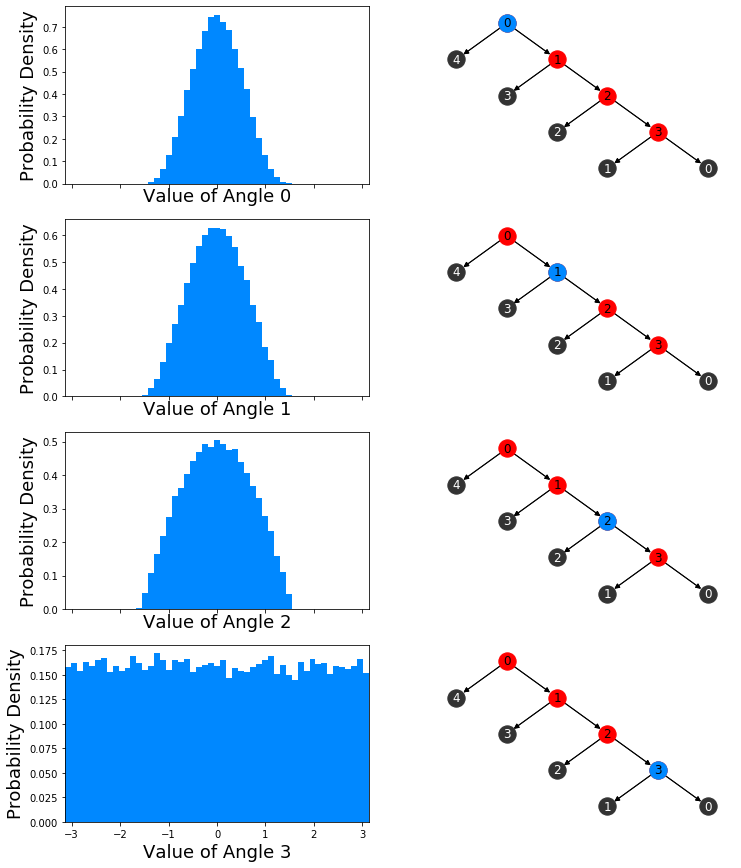

In [14]:
hpcs = HyperPolarCoordinateSystem(make_binary_tree(n_leaves=ndims, mode="unbalanced"))
rs, thetas = hpcs.x_to_r_theta(xnorm)

fig, axes = plt.subplots(ndims-1, 2, figsize=(12, 15), sharex="col")
axes[0, 0].set_xlim(-np.pi, np.pi)
for i in range(ndims-1):
    color = "#0088ff"
    axes[i, 0].set_ylabel("Probability Density".format(i), fontsize=18)
    axes[i, 0].set_xlabel("Value of Angle {}".format(i), fontsize=18)
    axes[i, 0].hist(thetas[:, i], 51, (-np.pi, np.pi), density=True, color=color)
    hpcs_tree_plot(hpcs, ax=axes[i, 1], highlight_node=hpcs.angle_nodes[i], highlight_color=color)


The above diagram needs a little unpacking. The right hand side shows the tree which is being used to construct the coordinate system. Each non-leaf node of the tree represents an angle and the tree structure is repeated with a different angle node being highlighted each time. Because the leaf nodes represent coordinates in a rectangular coordinate system and the non-leaf nodes represent angles in a spherical coordinate system both the leaves and the non-leaf nodes are labeled on the basis of their given index within the appropriate coordinate set. So you will notice that there are two 0's in the above plot, one to indicate the node belonging to the first angle in spherical coordinates and one to indicate the node belonging to the first vector component in rectangular coordinates.

This coordinate system is a direct successor to the spherical polar coordinates in 3D and so you may not be surprised to see that the angles in this system tend to look like the polar angle in 3D. The coordinates are constrained to lie between -pi/2 and pi/2 (or equivalently -90 degrees and +90 degrees) just like a latitude on the earth. It is only the final angle which explores the full possible range of angles from -pi to +pi. 

This behavior is fairly easy to understand from looking at the position of these nodes in the binary tree. The very last angle node is the only node which has a full complement of angles. When you look at where this angle is in the tree this makes sense, since the last node has two children which are both rectangular coordinate nodes. This is exactly the simple situation that we get by treating those two coordinates as being part of a 2D polar coordinate system. We incorporate that coordinate sub-system into the larger higher dimensional syste by simply multiplying by the radius of the vector spanned by just the 2 child coordinates. Likening this back to the system of earth latitudes and longitudes this is the longitude angle and just like the longitude angle of the earth it runs a full 2pi or 360 degrees.  

All the other angle nodes however have exactly one leaf child node and one non-leaf child node. These are very much like the polar angles in 3D spherical polar coordinates and the fact that they are constrained to lie within -pi/2 to pi/2 is just a consequence of the fact that one of the two children nodes is a radius and therefore will always be non-negative, at least in the inverse formula given above. Because of this we populate only half the plane of possible angles. 

# Balanced Tree Spherical Coordinates

What if we look at the angle distribution coming from a more balanced binary tree?

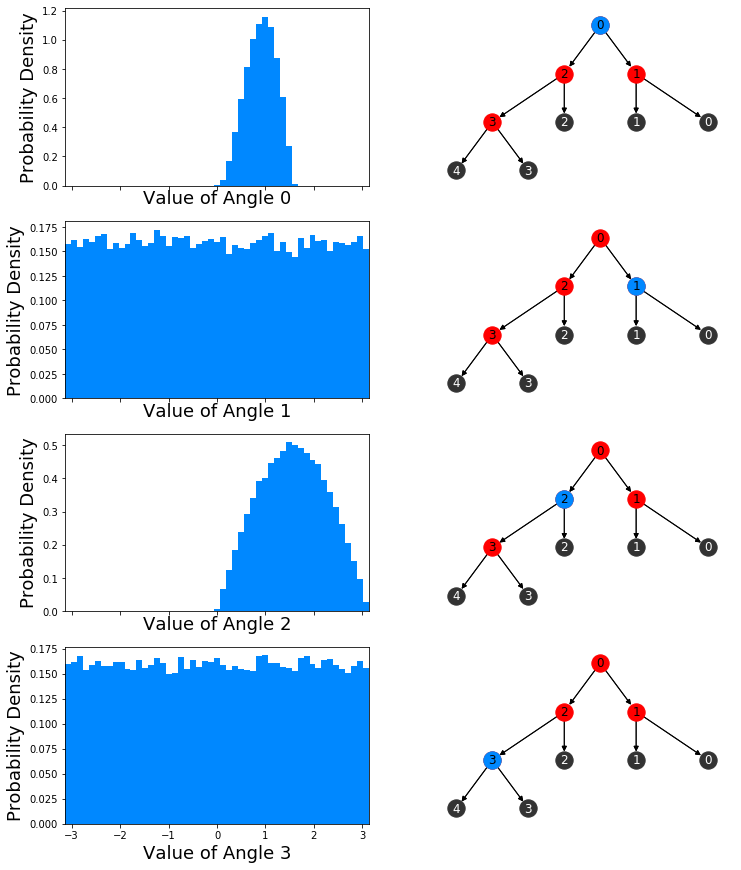

In [15]:
hpcs = HyperPolarCoordinateSystem(make_binary_tree(n_leaves=ndims, mode="balanced"))
rs, thetas = hpcs.x_to_r_theta(xnorm)

fig, axes = plt.subplots(ndims-1, 2, figsize=(12, 15), sharex="col")
axes[0, 0].set_xlim(-np.pi, np.pi)
for i in range(ndims-1):
    color = "#0088ff"
    axes[i, 0].set_ylabel("Probability Density".format(i), fontsize=18)
    axes[i, 0].set_xlabel("Value of Angle {}".format(i), fontsize=18)
    axes[i, 0].hist(thetas[:, i], 51, (-np.pi, np.pi), density=True, color=color)
    hpcs_tree_plot(hpcs, ax=axes[i, 1], highlight_node=hpcs.angle_nodes[i], highlight_color=color)



With the tree structured in this way we get two angle nodes both of whose children are are both coordinates and as such we have two completely uniform angle distributions. But we also have two new kinds of nodes. Angle 0, the angle belonging to the root node runs from 0 to pi/2 radians. This is because in this tree the children of the root node are both non-leaf nodes and so will always both be assigned non-negative numbers for the inverse formula, putting our angles firmly in the first quadrant. You may be surprised to see that the distribution of angle 2 differs from the distribution of the angles with a seemingly similar situation where one of the children nodes is a leaf node and one an internal node of the tree. But instead of spanning -pi/2 to pi/2 this angle spans from 0 to pi. That is because instead of assigning the leaf child the cosine factor, in this tree layout the leaf child happened to be assigned the sine factor of its parents node (instead of the cosine factor as in the "regular" hyper spherical polar expansion).  

# Spatial Distribution Corresponding to Uniform Angular Distribution

So what does the distribution of vectors in rectangular coordinates look like when we pick our angles from a uniform distribution?

If you consider the case of latitudes and longitudes on the earth again. If you pick a random latitude and random longitude then you are proportionally much more likely to pick a point in antartica than you would be to pick a point in an equivalently sized area in the united states. The various different longitude angles all start to pile up on each other close to the poles. The distance over the surface of the earth corresponding to differences in longitude depends on the latitude of those points. For a constant latitude $\phi$ the distance over the surface of the earth  $r_{e}sin(\phi)\delta \theta$. Because of this for points close to the equator where $\phi$ is 90 degrees the sin factor is equal to 1 and both changes in latitude and longitude correspond to about 69 miles per 1 degree. If we are standing right on the pole then $sin(\phi)$ goes to zero and changes in longitude become 0 miles per degree, while latitude is still sensitive. 

As the dimension increases this pile up of points in certain regions of the sphere becomes much more pronounced. This can easily be understood from a mathematical direction since if any node in the tree has an angle which is close to 0 then all the coordinates down stream from the sine branch of that angle node will all be exactly 0. This means that the deeper the hierarchy of the tree we use the more likely that we simply pick 0's for some of the vector coordinates when we pick uniformly in angle space.

# Sampled Coordinate Vectors 

Lets look at the coordinate values of a few vectors corresponding to angles chosen uniformly in angle space. Because the effects are made much more dramatic by high dimensionality we will ratchet up the dimension of our examined space a bit.

In [16]:
ndims = 16
balanced = HyperPolarCoordinateSystem(make_binary_tree(n_leaves=ndims, mode="balanced"))
unbalanced = HyperPolarCoordinateSystem(make_binary_tree(n_leaves=ndims, mode="unbalanced"))


rtheta = np.random.uniform(-np.pi, np.pi, size=(50000, ndims-1))
x_balanced = balanced.r_theta_to_x(1.0, rtheta)
x_unbalanced = unbalanced.r_theta_to_x(1.0, rtheta)

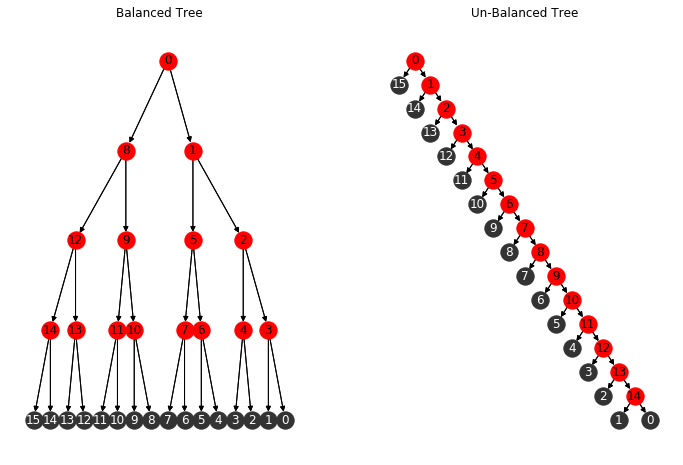

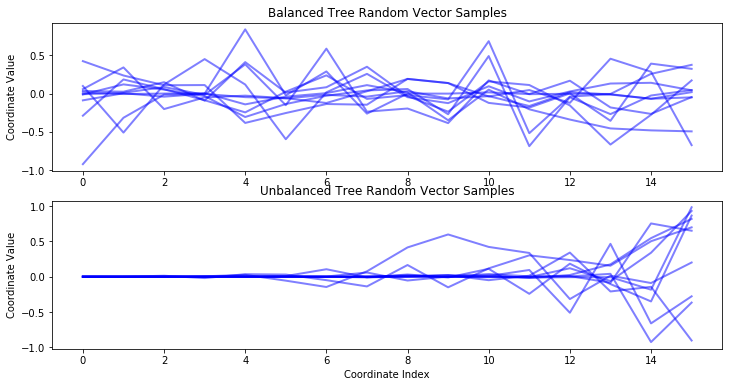

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
hpcs_tree_plot(balanced, ax=axes[0])
hpcs_tree_plot(unbalanced, ax=axes[1])
axes[0].set_title("Balanced Tree")
axes[1].set_title("Un-Balanced Tree")

fig, axes = plt.subplots(2, figsize=(12, 6))
for i in range(10):
    axes[0].plot(x_balanced[i], alpha=0.5, lw=2, c="blue")
    axes[1].plot(x_unbalanced[i], alpha=0.5, lw=2, c="blue")

axes[0].set_title("Balanced Tree Random Vector Samples")
axes[1].set_title("Unbalanced Tree Random Vector Samples")
axes[0].set_ylabel("Coordinate Value")
axes[1].set_ylabel("Coordinate Value")
axes[1].set_xlabel("Coordinate Index");

As you can see the coordinates which are very deep in the unbalanced tree hierarchy have ver small variance, since the chances of all of the angles above them in the tree being close to 1 are very small, and it requires only one near zero angle to zero out all the coordinate nodes deeper in the tree.

On the other hand because the balanced binary tree has an average node depth which scales like the logarithm of the number of dimensions, and just as importantly because every coordinate sits at close to the same hierarchy depth, the amount of variance in each coordinate is close to flat in the case of the balanced tree, and every coordinate dimension shows variation. 

# PCA

The directions in space where the direction vectors all sort of pile up on top of each other defines in a way defines the "shape" of the coordinate space dictated by each tree structure. In the case of latitude and longitude coordinates we can tell where the north and south poles are because points chosen uniformly in angle will tend to pile up at the poles. 

We can generalize this to any number of dimensions and get a sense for where the points pile up and to what extent by using PCA.

In [18]:
pca_balanced = PCA().fit(x_balanced)
u_balanced = pca_balanced.transform(x_balanced)
pca_unbalanced = PCA().fit(x_unbalanced)
u_unbalanced = pca_balanced.transform(x_unbalanced)

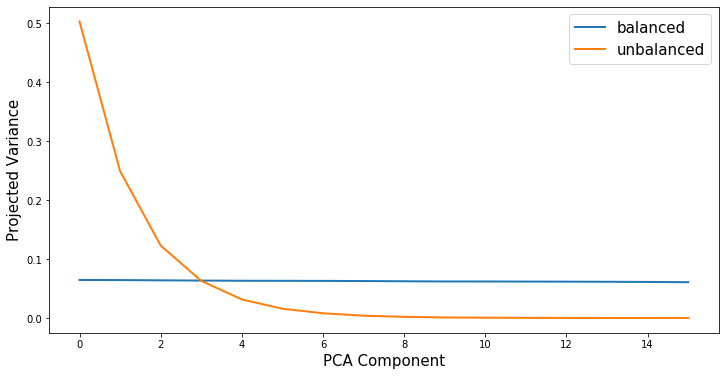

In [19]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(pca_balanced.explained_variance_ratio_, lw=2, label="balanced")
plt.plot(pca_unbalanced.explained_variance_ratio_, lw=2, label="unbalanced")
plt.xlabel("PCA Component", fontsize=15)
plt.ylabel("Projected Variance", fontsize=15)
plt.legend(loc="best", fontsize=15)

For the unbalanced tree the variation piles up around just a hand full of directions and then drops off exponentially as we head deeper into the tree hierarchy. In stark contrast the amount of variation in every direction is nearly the same. 

So astonishingly, the balanced binary trees are such that uniformly distributed angles "nearly" uniformly cover the sphere! We get an even clearer picture of this by looking at the distribution of points in projection along the first couple principal components of each expansion.

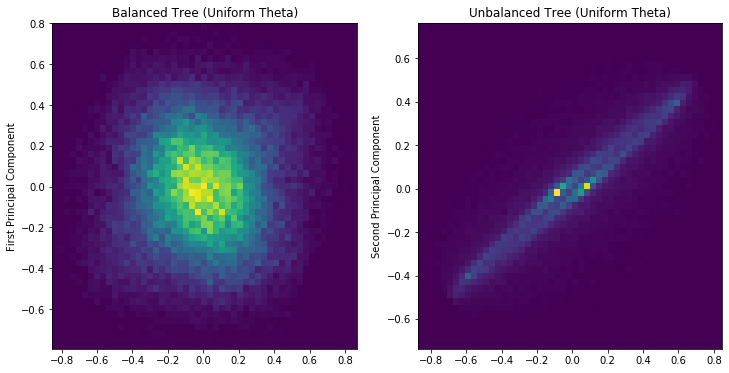

In [20]:
fig, axes=plt.subplots(1, 2, figsize=(12, 6))
nbins = 51
axes[0].hist2d(u_balanced[:, 0], u_balanced[:, 1], nbins)
axes[1].hist2d(u_unbalanced[:, 0], u_unbalanced[:, 1], nbins);
axes[0].set_title("Balanced Tree (Uniform Theta)")
axes[1].set_title("Unbalanced Tree (Uniform Theta)")
axes[0].set_ylabel("First Principal Component")
axes[1].set_ylabel("Second Principal Component");

In the case of the balanced binary tree the points are very spread out, with no obvious pole structure. Whereas in the case of the unbalanced tree it is very clear that the points prefer just a very few directions in the higher dimensional space, namely the points which lie close to the dominant polar direction (recognizable as the two bright points in the above plot).

# Singularity Structure 

Inevitably in any angular coordinate system there will be points where particular directions of change will have no effect on particular angles. These are the directions where a uniform distribution in angles will start to pile up along.  We will call these spatial locations "singularities". 

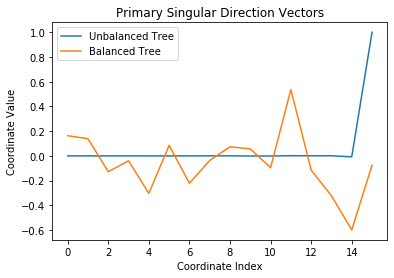

In [21]:
plt.plot(pca_unbalanced.components_[0], label="Unbalanced Tree")
plt.plot(pca_balanced.components_[0], label="Balanced Tree")
plt.legend(loc="best")
plt.title("Primary Singular Direction Vectors")
plt.xlabel("Coordinate Index")
plt.ylabel("Coordinate Value");

The principal vector of the unbalanced tree points nearly directly towards the vector of all zeros except for the last coordinate entry. Looking at the corresponding binary tree structure it is easy to see that this vector is the unique vector which can be specified simply by setting the angle at only the root node. The angles at all other nodes are irrelevant since all the availble coordinate magnitude has already been assigned upstream. 

On the other hand the principal vector corresponding to the balanced tree doesn't seem to have any obvious interpretability at all. This is because as we saw from the projected variance plot we made above the balanced binary tree doesn't really have any directions where the points pile up! 

Because we are using a finite number of points to determine the principal component expansion the directions of singularity which we discover will be slightly off from the true locations of singularity in our coordinate map. PCA is mathematically equivalent to finding the eigenvectors of the covariance matrix of our data. In cases where the eigenvalues are all distinct, the eigenvectors are well defined. Whereas in situations where there are many eigenvectors with the same or nearly the same eigenvalue, any admixture of eigenvectors is also nearly an eigenvector. This makes eigenvectors of systems with flat eigenspectra somewhat ambiguous, there is no one "right" set of eigenvectors.

In the case of PCA the amount of variance projected along a principal vector is equal to the eigenvalue of that principal vector with respect to the data covariance matrix. From the plot above where we compared the amount of variance projected along each principal vector for the balanced and ublanced trees it is easy to see that the eigen spectrum of the balanced tree is flat, making the principal vectors arbitrary. Whereas the eigenspectrum of the balanced tree falls sharply making the eigenvectors unique and well defined.

# Effect of Small Perturbations on Angles

This means that the effect of small perturbations in spatial location have completely different sorts of effects on angles depending on the sort of tree which has been used to build the angular space representation. In the case of the unbalanced tree coordinate system tiny perturbations in location which occur close to the maximally singular directions have dramatic effects on every angle except the root angle (which stays stable). But for perturbations which happen in the regions of space which are maximally separated from the singular directions the changes to all angles are small and smooth. 

In contrast for the balanced tree, even close to the maximally singular directions most angles are well determined and small perturbations correspond to small changes in angle space. However there are also almost no dirrections where small perturbations cannot cause large effective changes in angle. Lets take a look at this graphically.

In [22]:
def make_angle_perturbation_plot(
    hpcs,
    xvec, 
    perturbations,
    label=None,
    ax=None
):
    if ax is None:
        fig, ax = plt.subplots()
    r0, central_theta = hpcs.x_to_r_theta(xvec)
    rs, pturb_thetas = hpcs.x_to_r_theta(xvec+perturbations)
    
    for i in range(len(perturbations)):
        ax.plot(pturb_thetas[i], color="b", alpha=0.5)

    ax.plot(central_theta, color="r", lw=2)
    

In [23]:
perturbations = 0.05*np.random.normal(size=(50, ndims))

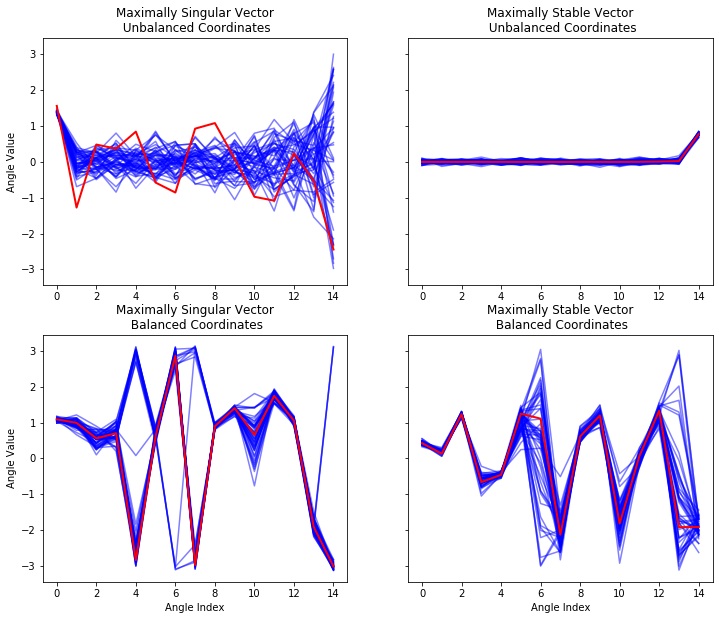

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharey=True)

ax = axes[0, 0]
ax.set_title("Maximally Singular Vector\n Unbalanced Coordinates")
make_angle_perturbation_plot(unbalanced, pca_unbalanced.components_[0], perturbations, ax=ax)
ax = axes[1, 0]
ax.set_title("Maximally Singular Vector\n Balanced Coordinates")
make_angle_perturbation_plot(balanced, pca_balanced.components_[0], perturbations, ax=ax)

ax = axes[0, 1]
ax.set_title("Maximally Stable Vector\n Unbalanced Coordinates")
make_angle_perturbation_plot(unbalanced, pca_unbalanced.components_[-1], perturbations, ax=ax)
ax = axes[1, 1]
ax.set_title("Maximally Stable Vector\n Balanced Coordinates")
make_angle_perturbation_plot(balanced, pca_balanced.components_[-1], perturbations, ax=ax)

axes[1, 0].set_xlabel("Angle Index")
axes[1, 1].set_xlabel("Angle Index")

axes[0, 0].set_ylabel("Angle Value")
axes[1, 0].set_ylabel("Angle Value");

Effectively we can think of this as a simple expression of the idea that angles which have more parent angle nodes above them in the tree have much more sensitive behavior than thoe that have fewer parent nodes. The root angle (angle 0 here in both cases) is always well defined no matter where in space the base vector is. But angles which lie deeper down in the tree become more and more ill defined. 

The degree to which any given angle is ill determined however is related to the point in space represented. If any of the angles upstream from a given angle is such that the factor which its children accumulates when calculating the coordinates is close to 0 then that angle will be ill determined. 